In [2]:
from sectional_v2.util.eusaar_data import *
import sectional_v2.util.eusaar_data as lfc
import sectional_v2.util.eusaar_data
from sectional_v2.constants import get_plotpath

In [3]:
# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from sectional_v2.constants import get_outdata_path
path_in = get_outdata_path('eusaar')
version ='_noresmv21_dd'
file_in = path_in + 'Nd_cat_sources_timeseries%s.csv'%version
plot_path = get_plotpath('eusaar')

version ='_noresmv21dd_both'

In [5]:
# case_ns = 'noSECTv11_ctrl_fbvoc'
# case_sec = 'SECTv11_ctrl_fbvoc'
case_sec='SECTv21_ctrl_koagD' #'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
case_ns ='noSECTv21_ox_ricc' #'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl
cases_ns = ['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']
cases_s = [case_sec]
cases = cases_ns + cases_s
eusaar='eusaar'

## Plotting functions:

In [6]:
from sectional_v2.data_info import get_nice_name_case

def plot_jointplot_cases(ddic, eusaar, cases, unit, var, xl, ul=1.5, ll=4.):
    for case in cases:
        plot_jointplot(ddic,eusaar,case,unit,var,xl,ul=ul,ll=ll)

def plot_jointplot(ddic, eusaar, nsec, unit, var, xl, ul=1.5, ll=4.):
    data = ddic[nsec]  # ".keys()
    data = data['log']
    # fi, axs = plt.subplots(2, sharex=True)
    xl = var + '_' + eusaar
    yl = var + '_' + nsec
    g = sns.jointplot(x=xl, y=yl, data=data, kind="hex", gridsize=20)
    # x0, x1 = g.ax_joint.get_xlim()
    # y0, y1 = g.ax_joint.get_ylim()
    # ul = 3.8#max(x0, y0)
    # ll = 1#min(x1, y1)
    lims = [ul, ll]
    ul_int = np.floor(ul)
    ll_int = np.ceil(ll) + 1
    g.ax_joint.set_yticks(np.arange(ul_int, ll_int))
    g.ax_joint.set_xticks(np.arange(ul_int, ll_int))
    g.ax_joint.set_yticklabels(10 ** np.arange(ul_int, ll_int))  # np.arange(1,6))
    g.ax_joint.set_xticklabels(10 ** np.arange(ul_int, ll_int))  # np.arange(1,6))
    g.ax_joint.set_xlabel('%s: %s %s' % (var, get_nice_name_case(eusaar), unit))  # np.arange(1,6))
    g.ax_joint.set_ylabel('%s: %s %s' % (var, get_nice_name_case(nsec), unit))  # np.arange(1,6))
    g.ax_joint.plot(lims, lims, ':k')
    g.ax_joint.set_xlim(lims)  # , lims)#, ':k')
    g.ax_joint.set_ylim(lims)  # , lims)#, ':k')
    plt.plot()
    plt.tight_layout()
    fp = plot_path + '/%s_jointplot_%s_allstations_%s' % (var, nsec, version)
    print(fp)

    plt.savefig(fp + '.png')
    plt.savefig(fp + '.pdf')
    plt.show()
    return xl

In [7]:
def plot_station_by_station(ddic, cases, typ, var):
    """

    :param ddic:
    :param typ:
    :param var:
    :return:
    """
    case_dic={}
    for case in cases:
        case_dic[case]=sectional_v2.util.eusaar_data.get_dif(ddic, case, typ=typ)
    #sec_d = sectional_v2.util.eusaar_data.get_dif(ddic, sec, typ=typ)
    #nsec_d = sectional_v2.util.eusaar_data.get_dif(ddic, nsec, typ=typ)
    fig, axs = sectional_v2.util.eusaar_data.plot_hist_grid_cases(case_dic, var)
    fp = plot_path + '/%s_seas_station_diff_distrib_%s' % (var, version)
    # fig.set_size_inches(18.5, 10.5)
    fig.tight_layout(pad=1)
    fig.savefig(fp + '.png', dpi=fig.dpi, bbox_inches='tight')
    fig.savefig(fp + '.pdf', dpi=fig.dpi, bbox_inches='tight')  # , dpi=300)
    fig.show()
    return

def call_print_improvements(df_dic, nsec, qM, qm, sec, var, xl):
    ddic = get_ddic(df_dic, nsec, qM, qm, sec, var, xl)
    typ = 'norm'
    sec_d = sectional_v2.util.eusaar_data.get_dif(ddic, sec, typ=typ)
    nsec_d = sectional_v2.util.eusaar_data.get_dif(ddic, nsec, typ=typ)
    print_improvements(nsec_d, sec_d)
    return typ


def plot_eusaar_diff_seas(df_dic, cases, var, qM, qm, xl):
    ddic = lfc.get_ddic_cases(df_dic,cases, qM, qm, var, xl)

    fig, ax = plt.subplots(1)

    lfc.plot_den_dist_comp_cases(ddic, cases, var, ax=ax)
    plt.show()
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[8, 6])
    lfc.plot_den_dist_comp_seas_cases(ddic, cases, var, axs=axs.flatten())
    fp = plot_path + '/%s_season_diff_distribition_allstations_%s' % (var, version)
    plt.tight_layout()
    plt.savefig(fp + '.png', dpi=300)
    plt.savefig(fp + '.pdf', dpi=300)
    plt.show()

In [8]:
def plots_var(df=None, var='N30-100', qM=.98, qm=.02,cases=cases,
              eusaar='eusaar'):
    if df is None:
        df = pd.read_csv(file_in, index_col=0)

    cols = ['N100', 'N250', 'N30-50', 'N50', 'N50-100', 'N30-100']

    df_dic={}
    for case in cases + [eusaar]:
        df_dic[case]=sectional_v2.util.eusaar_data.clean_df(df,sc=case)
    #df_dic = {
    #    eusaar: sectional_v2.util.eusaar_data.clean_df(df, sc=eusaar),
    #    sec: sectional_v2.util.eusaar_data.clean_df(df, sc=sec),
    #    nsec: sectional_v2.util.eusaar_data.clean_df(df, sc=nsec),
    #}
    # yl = nsec
    # yl = nsec
    # var = 'N30-100'
    # qM = .98
    # qm = .02

    ddic = sectional_v2.util.eusaar_data.get_ddic_cases(df_dic, cases, qM, qm,var, eusaar)

    plot_eusaar_diff_seas(df_dic, cases, var, qM, qm, eusaar)

    #typ = call_print_improvements(df_dic, nsec, qM, qm, sec, var, eusaar)

    typ = 'norm'
    plot_station_by_station(ddic,cases, typ, var)

    unit = '[cm$^{-3}$]'
    for case in cases:
        xl = plot_jointplot(ddic, eusaar, case, unit, var, eusaar, ul=1.5, ll=4)
    #xl = plot_jointplot(ddic, eusaar, sec, unit, var, eusaar, ul=1.5, ll=4)

    # %%

In [9]:
df = pd.read_csv(file_in, index_col=0)

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
df

df[(df['station']=='ASP')&(df['source']=='eusaar')]

,station,time,N30-50,N50,N100,N250,N50-100,N30-100,flag_gd,source
350900,ASP,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,False,eusaar
350901,ASP,2008-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,False,eusaar
350902,ASP,2008-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,False,eusaar
350903,ASP,2008-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,False,eusaar
350904,ASP,2008-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,False,eusaar
...,...,...,...,...,...,...,...,...,...,...
368440,ASP,2009-12-31 20:00:00,232.795498,740.249446,330.644844,33.295952,409.604602,642.400100,True,eusaar
368441,ASP,2009-12-31 21:00:00,210.402021,685.947681,320.708669,39.353283,365.239011,575.641032,True,eusaar
368442,ASP,2009-12-31 22:00:00,175.439162,586.352212,299.959287,45.184125,286.392925,461.832087,True,eusaar
368443,ASP,2009-12-31 23:00:00,198.339491,574.509532,297.310516,48.774878,277.199017,475.538508,True,eusaar


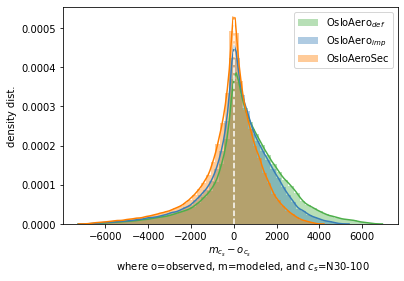

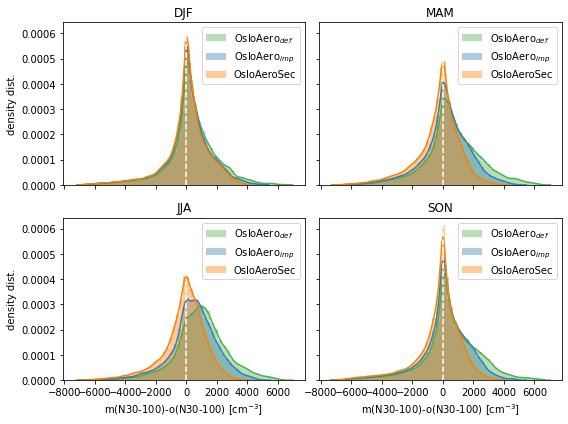

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N30-100_jointplot_noSECTv21_default_dd_allstations__noresmv21dd_both


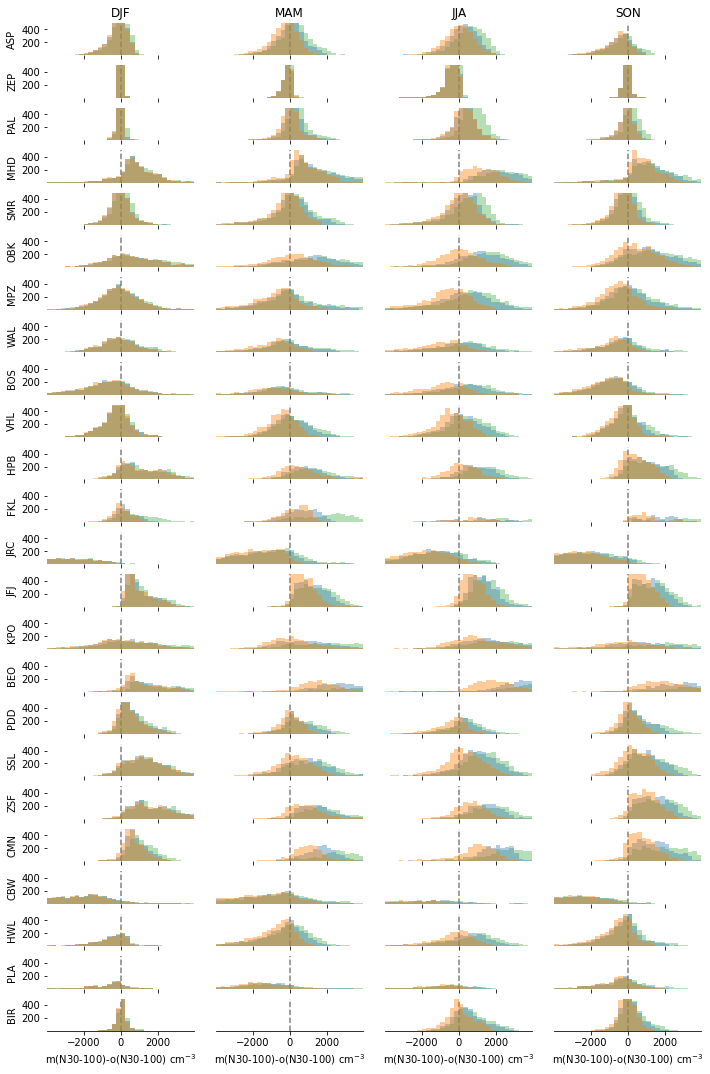

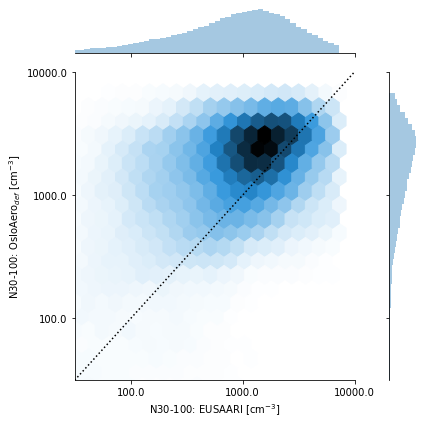

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N30-100_jointplot_noSECTv21_ox_ricc_dd_allstations__noresmv21dd_both


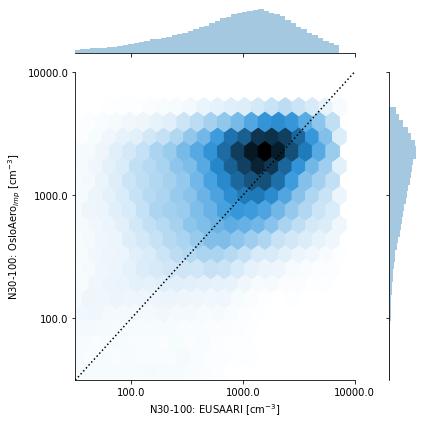

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N30-100_jointplot_SECTv21_ctrl_koagD_allstations__noresmv21dd_both


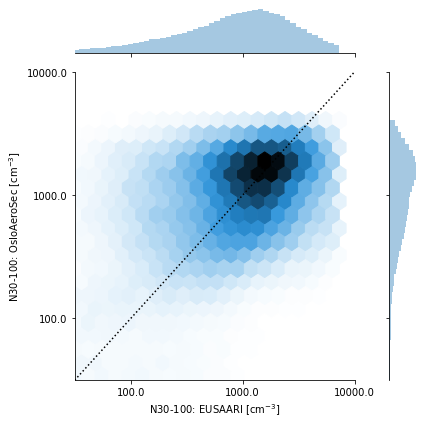

In [11]:
if __name__ == '__main__':
    df = pd.read_csv(file_in, index_col=0)
    plots_var(df)

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


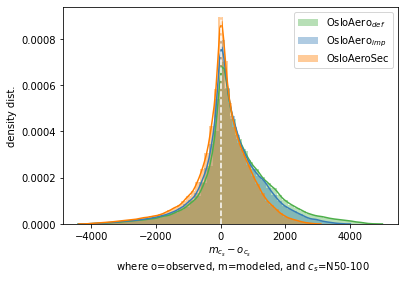

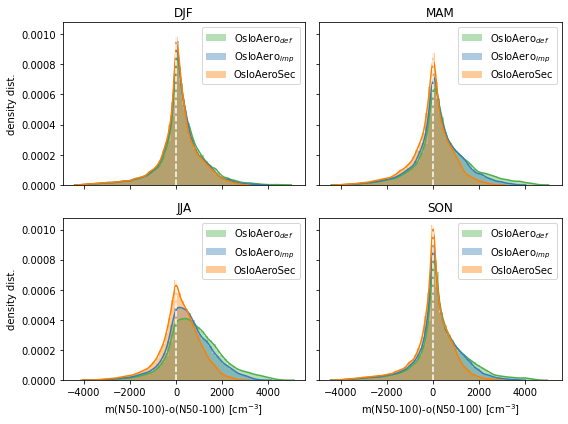

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N50-100_jointplot_noSECTv21_default_dd_allstations__noresmv21dd_both


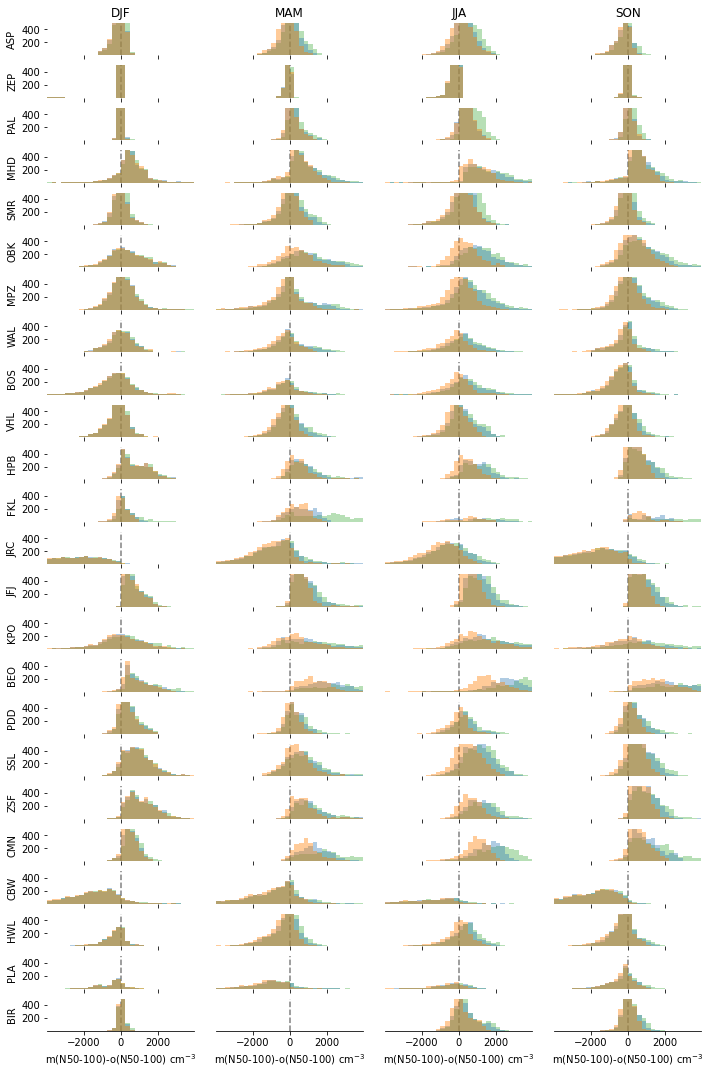

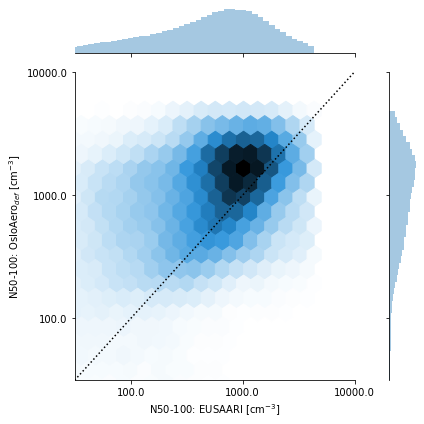

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N50-100_jointplot_noSECTv21_ox_ricc_dd_allstations__noresmv21dd_both


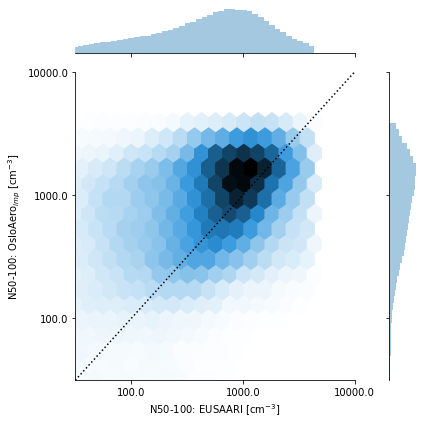

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/eusaar//N50-100_jointplot_SECTv21_ctrl_koagD_allstations__noresmv21dd_both


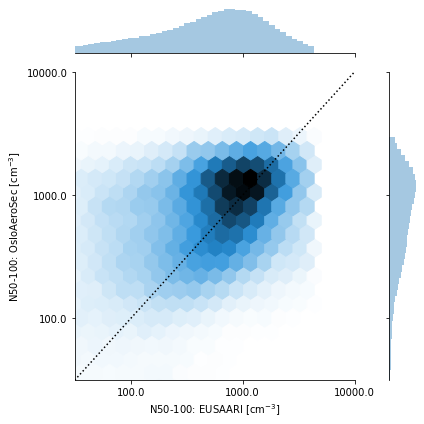

In [12]:
df = pd.read_csv(file_in, index_col=0)
plots_var(df, var='N50-100')

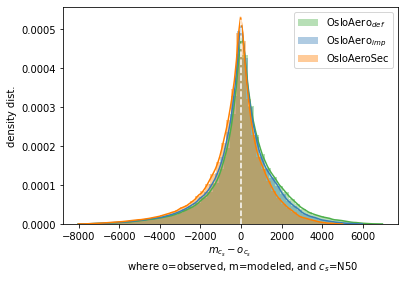

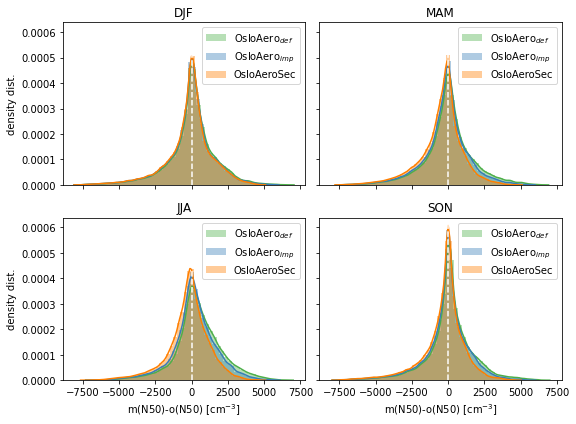

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [ ]:
plots_var(df, var='N50')

In [ ]:
df = pd.read_csv(file_in, index_col=0)
plots_var(df, var='N100')

In [ ]:
df = pd.read_csv(file_in, index_col=0)
plots_var(df, var='N100')